<a href="https://colab.research.google.com/github/Vekasssss/Superstore_Pyhton/blob/main/CUSTOMER_ANALYSIS__Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clustering the customers based their puchasing patterns**

- Project on K-Mean Clustering - Unsupervised learning

---



**1. Data Pre-Processing**

---



In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


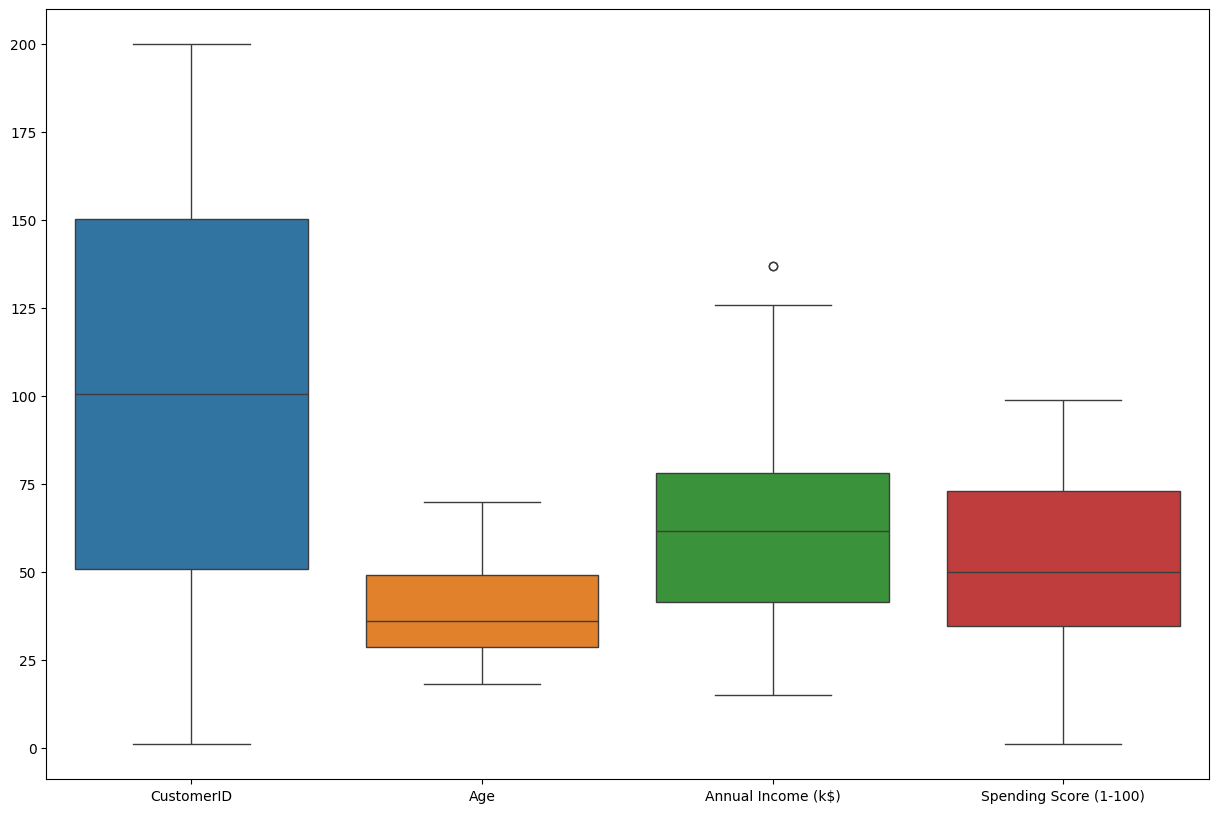

In [ ]:
# BOXPLOT
boxplt = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(data = df[boxplt])
plt.show()

# Here we can see there are few outliers in "ANNUAL INCOME"
# We can drop "Customer ID" as this will not be helpfull for purchasing pattern analysis

In [ ]:
df.drop(columns = ['CustomerID'], inplace = True)

<ipython-input-16-143c657a6961>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =df['Gender'], palette = 'viridis')


<Axes: xlabel='Gender', ylabel='count'>

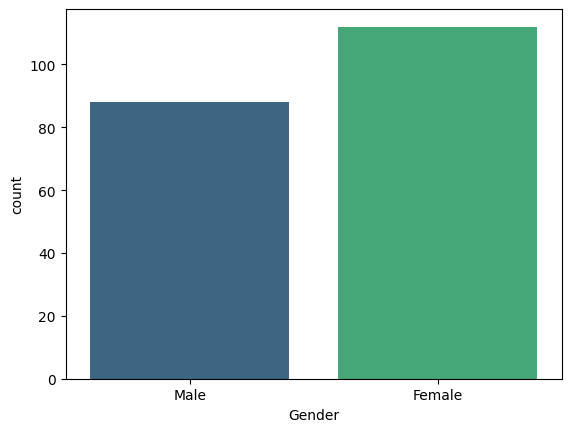

In [ ]:
# 1. EDA
# Count of MALE AND FEMALE -> Dataset contains more Female customers. Female customer visits more in store
sns.countplot(x =df['Gender'], palette = 'viridis')

In [ ]:
df.groupby('Gender')['Gender'].count()

Gender
Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
# 2. EDA
# CHECKING SPENDING POWER BY GENDER -> Females are spending more than males
a = df.groupby('Gender')['Spending Score (1-100)'].mean()
A= a.reset_index()
A

,Gender,Spending Score (1-100)
0,Female,51.526786
1,Male,48.511364


<ipython-input-24-3936e345b280>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =df['Gender'], y = df['Spending Score (1-100)'], palette ='viridis' )


<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

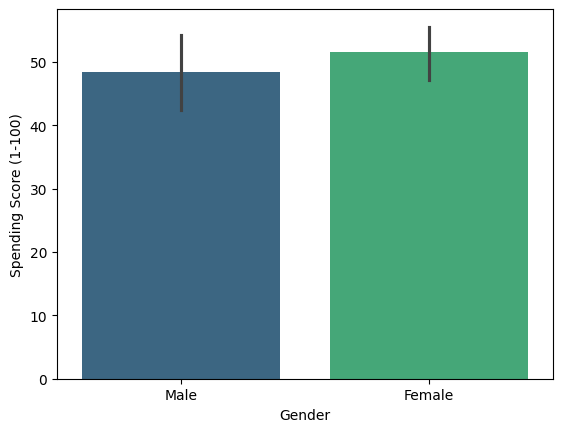

In [ ]:
sns.barplot(x =df['Gender'], y = df['Spending Score (1-100)'], palette ='viridis' )

In [ ]:
# 3. EDA
# Avreage Age by Gender -> Both Genders have similar age group of 38 years
df.groupby('Gender')['Age'].mean()

Gender
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

In [ ]:
age = df.groupby(['Gender','Age'])['Age'].count()
b = pd.DataFrame(age).rename(columns={'Age': 'count'})
B=b.sort_values(by = ['Gender','count'], ascending = [True, False])
BB = B.groupby('Gender').head(5)
BB

count
Gender Age       
Female 31       7
       23       6
       32       6
       35       6
       49       6
Male   19       6
       32       5
       48       5
       59       4
       18       3

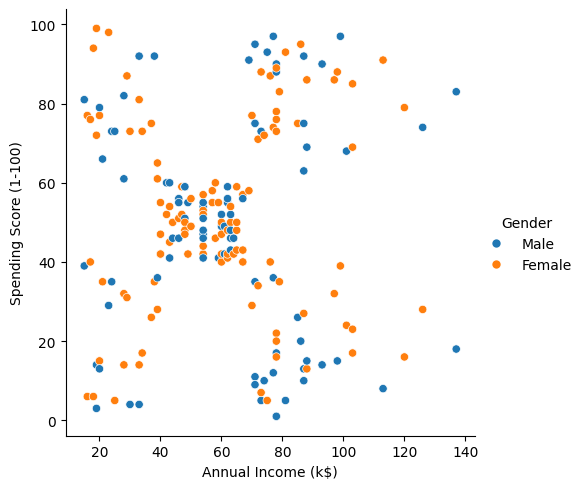

In [ ]:
# 4. EDA
# To analyze impact of Income on Spending score -> 5 clusters are visible with income and spending score patterns
# Income Bins($20k~$40k) & Bins($70k~$100k) have simlar spending score -> Bring similar offers both the Income bins
# Income Bins($40k~$70k) have moderate spending score 40-60 -> Bring offers to uplift the spendings in store
sns.relplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['Gender'])

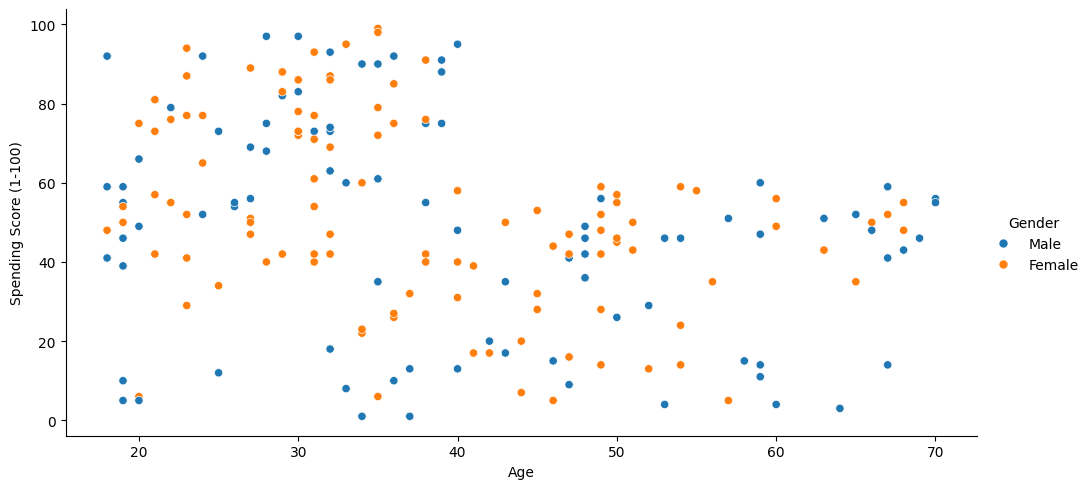

In [ ]:
# 4. EDA
# Analyze spending scores based on Age -> Aged group till 35 years are spending most.
# Age group from 30-70 years are spending less having spending score below 50 -> Bring offers and inventories this age groups
# Income is not directly proportional to Age
sns.relplot(x = df['Age'], y = df['Spending Score (1-100)'],  hue = df['Gender'], height = 5, aspect = 2)

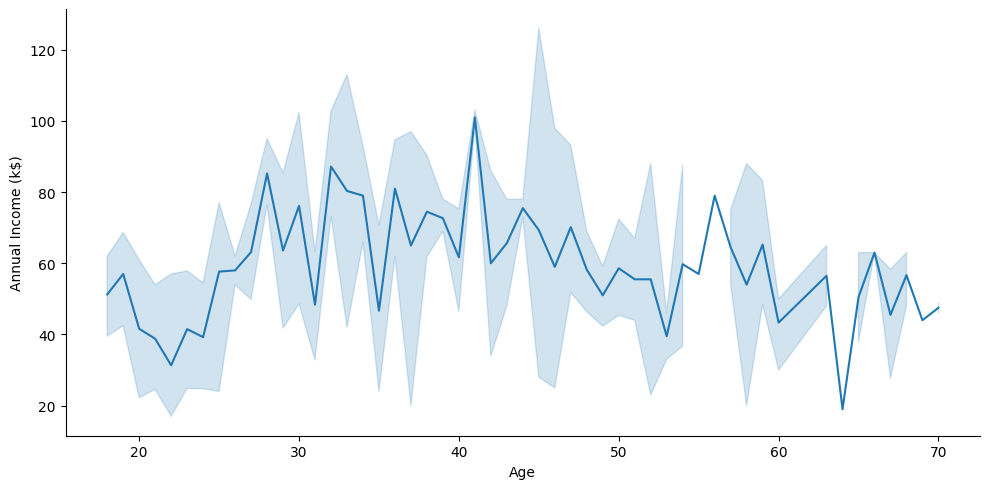

In [ ]:
sns.relplot(x = df['Age'], y = df['Annual Income (k$)'], kind='line', height = 5, aspect =2)

In [ ]:
df.head(1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39


In [ ]:
# 5. EDA
# Details of Top spending scores by Age (Irrespective Gender)
Maxx = df.groupby('Age')['Spending Score (1-100)'].mean().reset_index()
max = Maxx.sort_values(by = 'Spending Score (1-100)', ascending = False)
max.head(10)

,Age,Spending Score (1-100)
17,35,99
10,28,97
12,30,97
22,40,95
15,33,95
5,23,94
14,32,93
13,31,93
18,36,92
0,18,92


<ipython-input-63-83190fc51a0e>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x = max['Age'], y = max['Spending Score (1-100)'], kind = 'line', palette = 'viridis', height = 5, aspect = 2 )


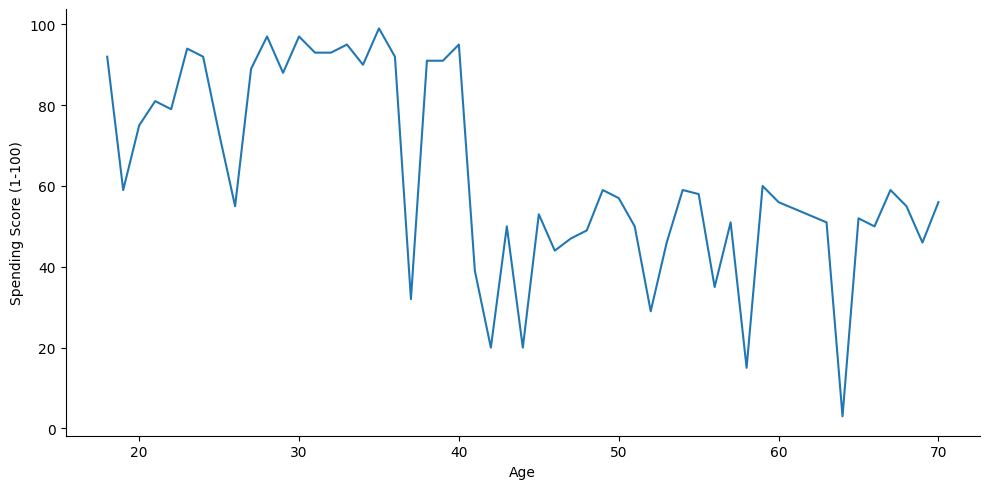

In [ ]:
sns.relplot(x = max['Age'], y = max['Spending Score (1-100)'], kind = 'line', palette = 'viridis', height = 5, aspect = 2 )

In [ ]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [ ]:
# SKEWNESS
# No skewness , EVERYTHING IS BETWEEN 0.5 TO -0.5
df_sk = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_sk.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

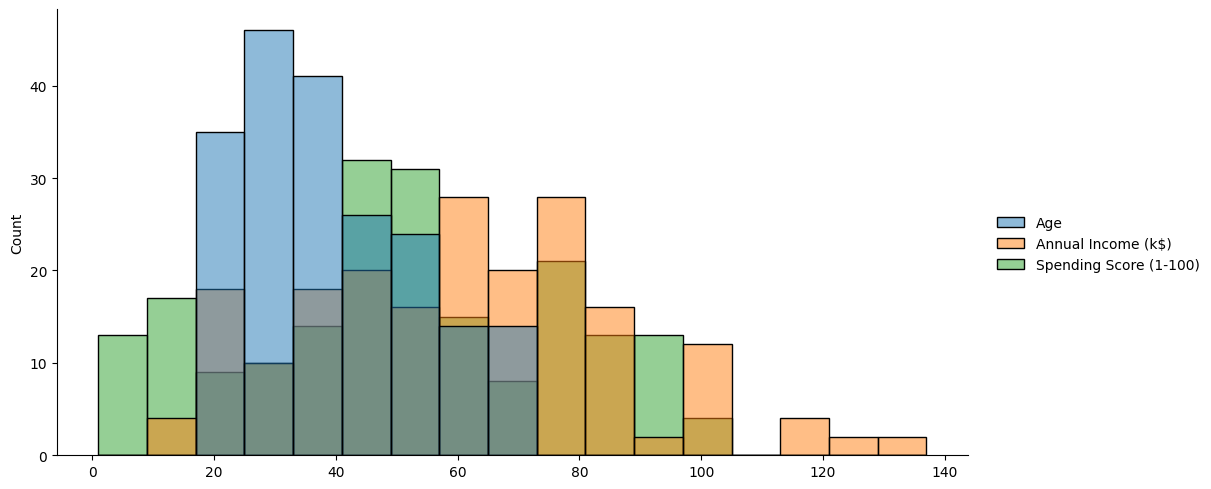

In [ ]:
sns.displot(data = df_sk, height = 5, aspect = 2)

In [ ]:
# CORRELATION
# We did not found strong correlation between columns. Everything is between 0.8 to -0.8
df_CR = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_CR.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

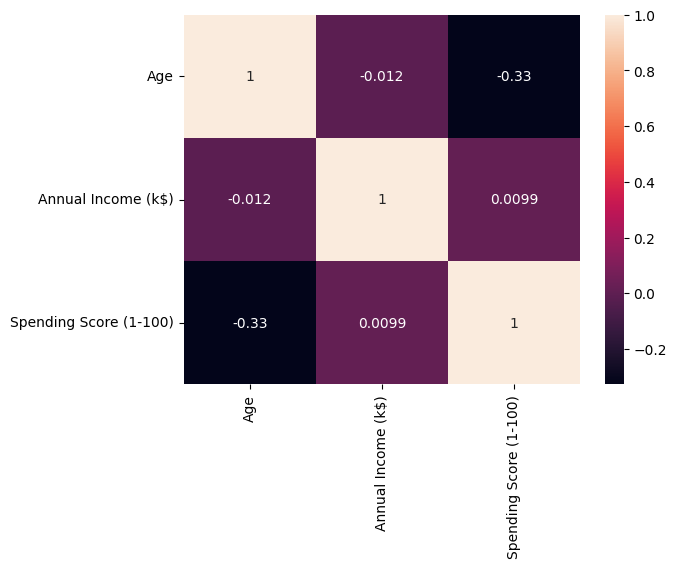

In [ ]:
sns.heatmap(df_CR.corr(), annot = True)

**2. DATA TRANSFORMATION AND STANDARDIZATION**

---



In [ ]:
# Data Transformation using - > Label Encoder
from sklearn.preprocessing import LabelEncoder
Labels = ['Gender']
for i in Labels:
  le = LabelEncoder()
  df[i]=le.fit_transform(df[i])

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
X = df.iloc[:, 0:]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [ ]:
# STANDARDIZATION using StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss= ss.fit_transform(X)
x = pd.DataFrame(X_ss)
x

,0,1,2,3
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


**3. FINDING N_CLUSTER VALUE BY ELBOW METHOD**

---



In [ ]:
# ELBOW METHOD
# INDICATED THE N-CLUSTERS BETWEEN 4~6
from sklearn.cluster import KMeans
k = []
wcss = []
for c in range(1,11):
  km = KMeans(n_clusters=c)
  km.fit(x)
  inert = km.inertia_
  k.append(c)
  wcss.append(inert)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

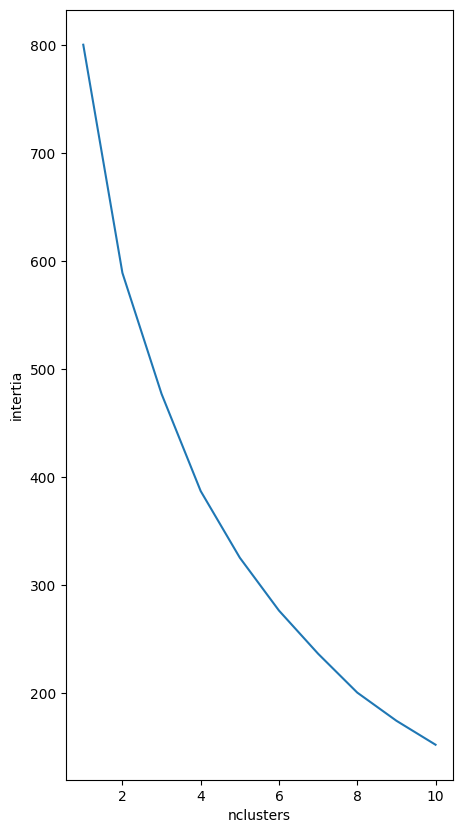

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,10))
plt.plot(k,wcss)
plt.xlabel('nclusters')
plt.ylabel('intertia')
plt.show()

**4. MODEL DEVELOPMENT AND EVALUATIONS**

---



In [ ]:
# Based on above elbow method, we can check for best n_cluster 3~7
from sklearn.metrics import silhouette_score , davies_bouldin_score
n=[]
sil=[]
dav=[]
for j in range(3,10):
  kk = KMeans(n_clusters = j)
  kk.fit(x)
  pred = kk.predict(x)
  s = silhouette_score(x, pred)
  davv = davies_bouldin_score(x, pred)
  n.append(j)
  sil.append(s)
  dav.append(davv)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
#EVALUATION
# Silhouette has to be more and Davies scores has to be less for good clustering model
# Based on below summary , we can select >>>n_clusters = 9<<<<
Summary = []
Summary.append(n)
Summary.append(sil)
Summary.append(dav)
Data = pd.DataFrame({'nclusters':Summary[0], 'silhouette':Summary[1], 'Davies':Summary[2]})
Data

,nclusters,silhouette,Davies
0,3,0.259513,1.357408
1,4,0.298397,1.280654
2,5,0.316908,1.143143
3,6,0.326202,1.028359
4,7,0.357510,0.974040
5,8,0.387894,0.946217
6,9,0.402252,0.874742


In [ ]:
kk = KMeans(n_clusters = 5)
model = kk.fit(x)
predd = model.predict(x)
df['clusters']= pd.DataFrame(predd)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


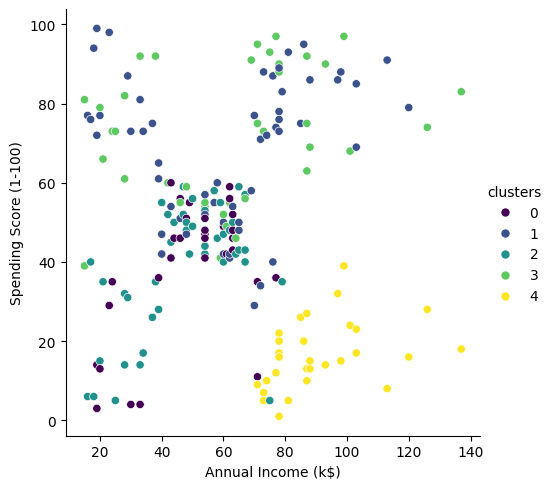

In [ ]:
import seaborn as sns
sns.relplot(x =df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['clusters'], palette='viridis')

In [ ]:
df.head(20)

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,2
5,0,22,17,76,1
6,0,35,18,6,2
7,0,23,18,94,1
8,1,64,19,3,0
9,0,30,19,72,1
